# Cats vs Dogs
- 고양이인지 강아지인지 이진분류

## Import

In [1]:
!pip install --q ipython-autotime
%load_ext autotime

time: 314 µs (started: 2024-07-01 05:48:05 +00:00)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')
import seaborn as sns

import tensorflow as tf
import keras

time: 15.6 s (started: 2024-07-01 05:48:05 +00:00)


## 데이터 불러오기

In [3]:
#!gdown https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR

time: 510 µs (started: 2024-07-01 05:48:21 +00:00)


In [4]:
#!unzip cats_and_dogs.zip

time: 245 µs (started: 2024-07-01 05:48:21 +00:00)


In [5]:
data_root = '/content/cats_and_dogs'
train_dir = data_root + '/train'
test_dir = data_root + '/test'

time: 513 µs (started: 2024-07-01 05:48:21 +00:00)


In [6]:
class_name = ['cats', 'dogs']

time: 348 µs (started: 2024-07-01 05:48:21 +00:00)


In [7]:
import os

train_cats_fnames = os.listdir(train_dir + '/cats')
train_dogs_fnames = os.listdir(train_dir + '/dogs')

time: 5.65 ms (started: 2024-07-01 05:48:21 +00:00)


In [8]:
import PIL

X_train = []
y_train = []

for fname in train_cats_fnames:
    image = PIL.Image.open(train_dir + '/cats/' + fname)
    image = image.resize((224,224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(0)

for fname in train_dogs_fnames:
    image = PIL.Image.open(train_dir + '/dogs/' + fname)
    image = image.resize((224,224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(1)

time: 22.6 s (started: 2024-07-01 05:48:21 +00:00)


In [9]:
print(len(X_train),len(y_train))

2600 2600
time: 1 ms (started: 2024-07-01 05:48:43 +00:00)


In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape, y_train.shape)

(2600, 224, 224, 3) (2600,)
time: 176 ms (started: 2024-07-01 05:48:43 +00:00)


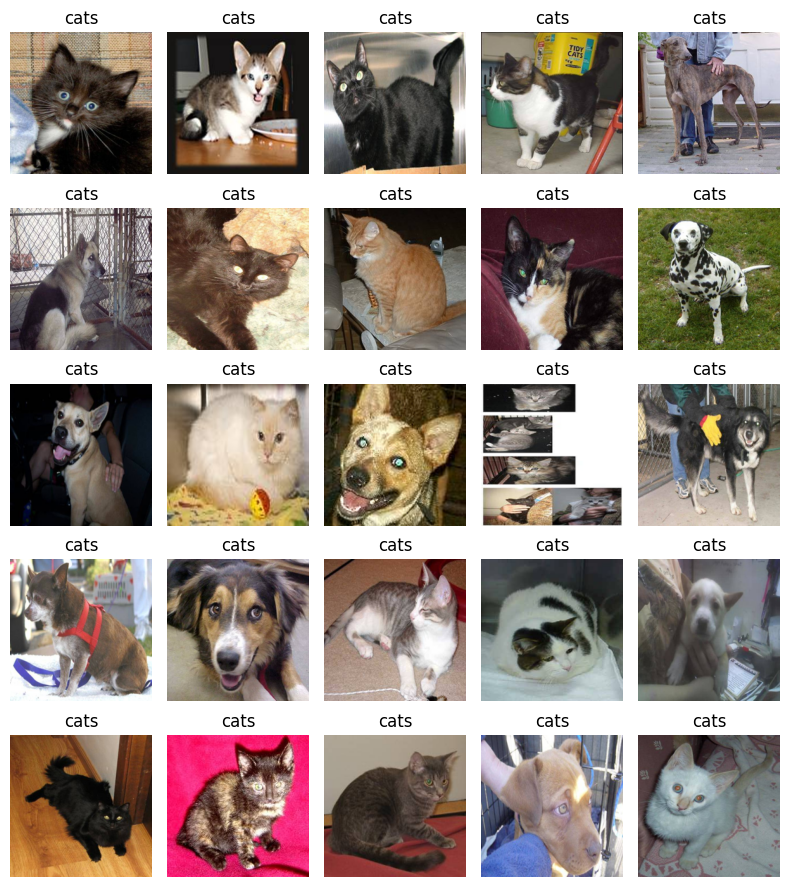

time: 5.03 s (started: 2024-07-01 05:48:44 +00:00)


In [11]:
np.random.seed(42)
sample = np.random.randint(2600, size = 25)
sample

plt.figure(figsize=(8,9))

for i, idx in enumerate(sample):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(class_name[y_train[idx]])
plt.tight_layout()
plt.show()

## 학습, 검증 데이터 분리

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(2080, 224, 224, 3) (2080,)
(520, 224, 224, 3) (520,)
time: 428 ms (started: 2024-07-01 05:48:49 +00:00)


In [13]:
sum(y_train)

1034

time: 3.26 ms (started: 2024-07-01 05:48:49 +00:00)


## 전처리

### X 값 스케일링

In [14]:
X_train_s = X_train.astype('float') / 255.
X_val_s = X_val.astype('float') / 255.

time: 1.23 s (started: 2024-07-01 05:48:49 +00:00)


## Model 학습

In [15]:
X_train_s.shape

(2080, 224, 224, 3)

time: 3.03 ms (started: 2024-07-01 05:48:50 +00:00)


In [16]:
from keras import layers

model = keras.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

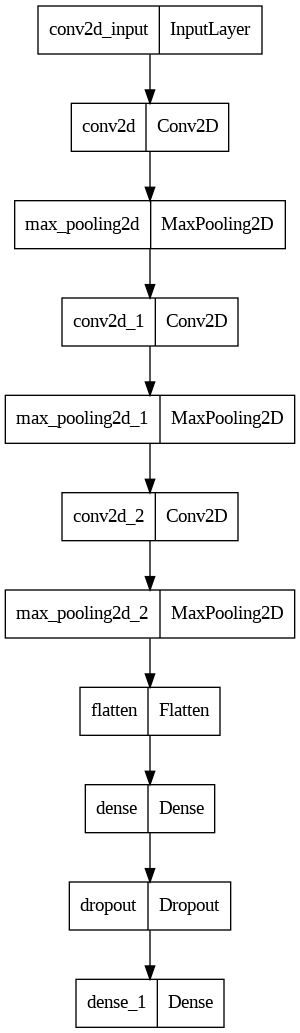

time: 365 ms (started: 2024-07-01 05:48:51 +00:00)


In [17]:
keras.utils.plot_model(model)

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

time: 26 ms (started: 2024-07-01 05:48:52 +00:00)


In [19]:
from keras import callbacks

es = callbacks.EarlyStopping(monitor='val_loss', patience=5)
ckpt_path = './temp/cats_dogs/ckpt'
ckpt = callbacks.ModelCheckpoint(filepath = ckpt_path, save_best_only=True)

time: 1.04 ms (started: 2024-07-01 05:48:52 +00:00)


In [20]:
EPOCHS = 15
BATCH_SIZE = 32

history = model.fit(X_train_s,y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    callbacks=[es], validation_data=(X_val_s,y_val))

Epoch 1/15
65/65 [==============================] - 12s 50ms/step - loss: 0.7221 - acc: 0.5231 - val_loss: 0.6863 - val_acc: 0.5135
Epoch 2/15
65/65 [==============================] - 2s 32ms/step - loss: 0.6860 - acc: 0.5558 - val_loss: 0.6673 - val_acc: 0.5635
Epoch 3/15
65/65 [==============================] - 2s 31ms/step - loss: 0.6577 - acc: 0.6346 - val_loss: 0.6476 - val_acc: 0.6346
Epoch 4/15
65/65 [==============================] - 3s 40ms/step - loss: 0.5968 - acc: 0.6827 - val_loss: 0.6019 - val_acc: 0.6981
Epoch 5/15
65/65 [==============================] - 2s 34ms/step - loss: 0.5083 - acc: 0.7543 - val_loss: 0.6065 - val_acc: 0.7019
Epoch 6/15
65/65 [==============================] - 2s 31ms/step - loss: 0.4383 - acc: 0.7909 - val_loss: 0.5607 - val_acc: 0.7231
Epoch 7/15
65/65 [==============================] - 2s 31ms/step - loss: 0.3614 - acc: 0.8394 - val_loss: 0.6829 - val_acc: 0.7135
Epoch 8/15
65/65 [==============================] - 2s 32ms/step - loss: 0.2977 - 

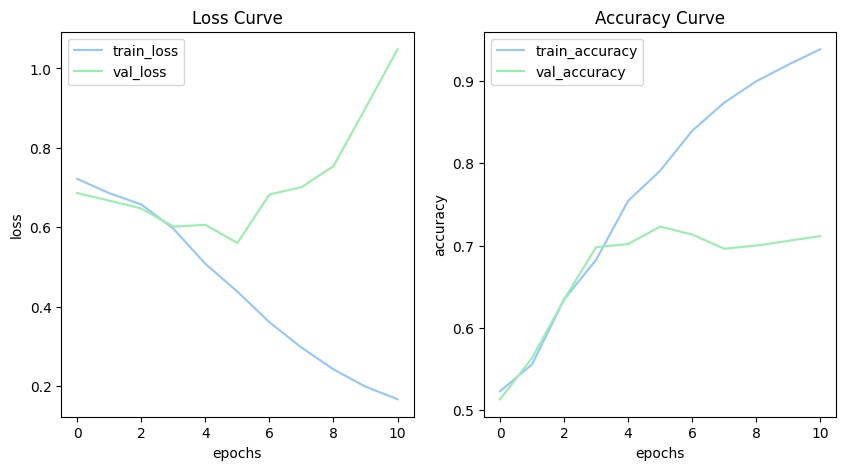

time: 7.44 s (started: 2024-07-01 05:49:32 +00:00)


In [21]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'],hist['loss'],label='train_loss')
    plt.plot(hist['epoch'],hist['val_loss'],label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'],hist['acc'],label='train_accuracy')
    plt.plot(hist['epoch'],hist['val_acc'],label='val_accuracy')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

plot_history(history)

## Test data 예측

### Test data 전처리

In [22]:
test_cats_fnames = os.listdir(test_dir + '/cats')
test_dogs_fnames = os.listdir(test_dir + '/dogs')

time: 1.02 ms (started: 2024-07-01 05:49:39 +00:00)


In [23]:
X_test = []
y_test = []

for fname in test_cats_fnames:
    image = PIL.Image.open(test_dir + '/cats/' + fname)
    image = image.resize((224,224))
    arr = np.array(image)
    X_test.append(arr)
    y_test.append(0)

for fname in test_dogs_fnames:
    image = PIL.Image.open(test_dir + '/dogs/' + fname)
    image = image.resize((224,224))
    arr = np.array(image)
    X_test.append(arr)
    y_test.append(1)

time: 1.48 s (started: 2024-07-01 05:49:39 +00:00)


In [24]:
X_test = np.array(X_test)
X_test_s = X_test.astype('float') / 255.
X_test_s.shape

(400, 224, 224, 3)

time: 191 ms (started: 2024-07-01 05:49:41 +00:00)


In [25]:
y_test = np.array(y_test)

time: 380 µs (started: 2024-07-01 05:49:41 +00:00)


### 예측

In [26]:
y_pred = model.predict(X_test_s)

13/13 [==============================] - 1s 44ms/step
time: 1.53 s (started: 2024-07-01 05:49:41 +00:00)


In [27]:
y_pred = (y_pred > 0.5).astype(int)

time: 2.14 ms (started: 2024-07-01 05:49:43 +00:00)


accuracy :  0.725
recall :  0.72
precision :  0.7272727272727273
f1 :  0.7236180904522613
-------------------------------------------------------


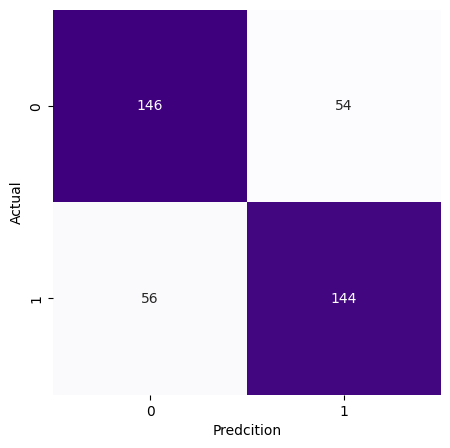

time: 209 ms (started: 2024-07-01 05:49:43 +00:00)


In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy : ', accuracy_score(y_true, y_pred))
    print('recall : ', recall_score(y_true, y_pred, average=aver))
    print('precision : ', precision_score(y_true, y_pred, average=aver))
    print('f1 : ', f1_score(y_true, y_pred, average=aver))
    print('-----'*11)
    cfm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize = (5,5))
    s = sns.heatmap(cfm, annot=True, fmt='d', cbar=False, cmap='Purples')
    s.set(xlabel='Predcition', ylabel='Actual')
    plt.show()

print_metrics(y_test,y_pred)

In [28]:
# 베스트 체크포인트 로딩
# model.load_weight(ckpt_path)

time: 218 ms (started: 2024-07-01 05:49:43 +00:00)
